# Simulate the CT scan

In [1]:
import os
import matplotlib.pyplot as plt
# from gvxrPython3 import gvxr
# from gvxrPython3 import json2gvxr
# from gvxrPython3.JSON2gVXRDataReader import *
# import json2gvxr
from JSON2gVXRDataReader import *

import SimpleITK as sitk

from cil.utilities.display import show_geometry
from cil.processors import TransmissionAbsorptionConverter
from cil.recon import FDK
from cil.utilities.jupyter import islicer

In [2]:
current_folder = str(globals()['_dh'][0])
data_path = "25OctoberData/"
JSON_fname = current_folder + "/" + data_path + "/visible_light.json"

In [3]:
# # Create an OpenGL context
# # MS Windows
# if os.name == "nt":
#     json2gvxr.initGVXR(JSON_fname, "OPENGL")
# # MacOS
# elif str(os.uname()).find("Darwin") >= 0:
#     json2gvxr.initGVXR(JSON_fname, "OPENGL")
# else:
#     json2gvxr.initGVXR(JSON_fname, "EGL")

In [4]:
# json2gvxr.initDetector(JSON_fname)
# json2gvxr.initSourceGeometry()
# json2gvxr.initSpectrum()
# json2gvxr.initSamples()

In [5]:
# json2gvxr.initScan()

In [6]:
reader = JSON2gVXRDataReader(file_name=JSON_fname)
data = reader.read(verbose=1)

Detecotr size: [147.1999969482422, 110.4000015258789, 'mm'] mm
Source position: [  15.48341516 -100.98875725    6.01621808] mm
Detector position: [-73.12152758 141.24848658  23.53249167] mm
Ray direction: [-0.3427291   0.93698782  0.06775397]
Rotation axis: [-0. -0. -1.]
Rotation axis position: [ -8.13567951 -31.9333843   14.5       ] mm
Angles: [  0.    3.6   7.2  10.8  14.4  18.   21.6  25.2  28.8  32.4  36.   39.6
  43.2  46.8  50.4  54.   57.6  61.2  64.8  68.4  72.   75.6  79.2  82.8
  86.4  90.   93.6  97.2 100.8 104.4 108.  111.6 115.2 118.8 122.4 126.
 129.6 133.2 136.8 140.4 144.  147.6 151.2 154.8 158.4 162.  165.6 169.2
 172.8 176.4 180.  183.6 187.2 190.8 194.4 198.  201.6 205.2 208.8 212.4
 216.  219.6 223.2 226.8 230.4 234.  237.6 241.2 244.8 248.4 252.  255.6
 259.2 262.8 266.4 270.  273.6 277.2 280.8 284.4 288.  291.6 295.2 298.8
 302.4 306.  309.6 313.2 316.8 320.4 324.  327.6 331.2 334.8 338.4 342.
 345.6 349.2 352.8 356.4 360. ] degrees
distance: 3.8426060204529855
[

In [7]:
print(data.geometry)

3D Cone-beam tomography
System configuration:
	Source position: [  15.48341516, -100.98875725,    6.01621808]
	Rotation axis position: [ -8.13567951, -31.9333843 ,  14.5       ]
	Rotation axis direction: [-0., -0., -1.]
	Detector position: [-73.12152758, 141.24848658,  23.53249167]
	Detector direction x: [ 0.93914592,  0.34351848, -0.        ]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [640 480]
	Pixel size: [0.23 0.23]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 101
	Angles 0-20 in degrees:
[ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. , 39.6,
 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4]
Distances in units: mm


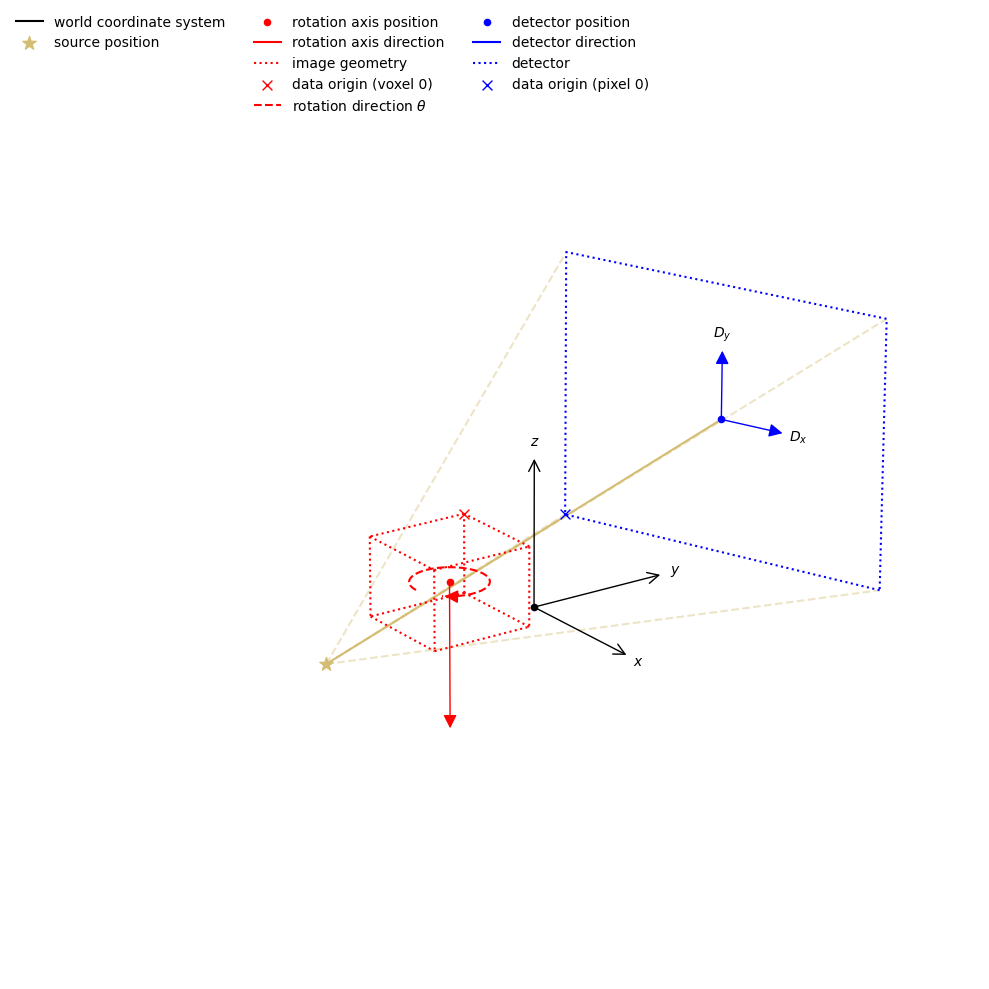

Saved image as /home/fpvidal/PROGRAMMING/GitHub/MyProjects/geometry.png


<Figure size 640x480 with 0 Axes>

In [8]:
show_geometry(data.geometry).save("geometry.png")

In [9]:
data.reorder(order='tigre')
data_corr = TransmissionAbsorptionConverter(white_level=data.max())(data)

In [10]:
ig = data.geometry.get_ImageGeometry()

recons = FDK(data_corr, ig).run()
# recons = FBP(data_corr, ig).run()

FDK recon

Input Data:
	angle: 101
	vertical: 480
	horizontal: 640

Reconstruction Volume:
	vertical: 480
	horizontal_y: 640
	horizontal_x: 640

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



In [11]:
islicer(recons, direction='vertical')

In [12]:
islicer(recons, direction='horizontal_x')